In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
np.set_printoptions(suppress=True)

In [2]:
# construct a list 'classes' to store all classes
classes = ['aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow',\
           'diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train','tvmonitor']
# load all data to an ndarray 'data'
dataset = ['data2012','data2007trainval','data2007test','trainval','trainval','test']
for i in range(int(len(dataset)/2)):
    datai = np.loadtxt('../'+dataset[i]+'/'+classes[0]+'_'+dataset[i+3]+'.txt')
    for classesi in classes[1:20]:
        temp = np.loadtxt('../'+dataset[i]+'/'+classesi+'_'+dataset[i+3]+'.txt')
        datai = np.concatenate((datai,temp),axis=1)
    if i==0:
        data = datai
    else:
        data = np.concatenate((data,datai),axis=0)

# delete the repeated columns in 'data'
didx = list(range(0,40,2))
data = np.delete(data,didx,axis=1)
# add indices to each image
idx = np.arange(data.shape[0]).reshape(data.shape[0],1) 
data = np.concatenate((idx,data),axis=1)
data.shape

(21503, 21)

In [3]:
11540+9963

21503

In [4]:
data[0:10]

array([[ 0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1.,  1., -1., -1., -1.,  1., -1.],
       [ 2., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 3., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         1., -1.,  1., -1., -1., -1., -1., -1.],
       [ 4., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 5., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 6., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 7., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 8.,  1., -1., -

In [5]:
# import the name/index of each image
dataname = []
for i in range(int(len(dataset)/2)):
    with open('../'+dataset[i]+'/'+classes[0]+'_'+dataset[i+3]+'.txt', 'r') as file:
        datatemp = file.readlines()  
        for line in datatemp:
            linei = line.split()
            dataname.append(linei[0])
len(dataname)


21503

In [6]:
dataname[11540]

'000005'

In [7]:
# a dictionary for integer index and the real name
datadict = dict(zip(range(data.shape[0]),dataname))
datadict

{0: '2008_000002',
 1: '2008_000003',
 2: '2008_000007',
 3: '2008_000008',
 4: '2008_000009',
 5: '2008_000015',
 6: '2008_000016',
 7: '2008_000019',
 8: '2008_000021',
 9: '2008_000023',
 10: '2008_000026',
 11: '2008_000027',
 12: '2008_000028',
 13: '2008_000032',
 14: '2008_000033',
 15: '2008_000034',
 16: '2008_000036',
 17: '2008_000037',
 18: '2008_000041',
 19: '2008_000042',
 20: '2008_000043',
 21: '2008_000045',
 22: '2008_000050',
 23: '2008_000051',
 24: '2008_000052',
 25: '2008_000053',
 26: '2008_000054',
 27: '2008_000056',
 28: '2008_000059',
 29: '2008_000060',
 30: '2008_000062',
 31: '2008_000064',
 32: '2008_000066',
 33: '2008_000067',
 34: '2008_000070',
 35: '2008_000073',
 36: '2008_000074',
 37: '2008_000075',
 38: '2008_000076',
 39: '2008_000078',
 40: '2008_000080',
 41: '2008_000082',
 42: '2008_000084',
 43: '2008_000085',
 44: '2008_000089',
 45: '2008_000090',
 46: '2008_000093',
 47: '2008_000095',
 48: '2008_000096',
 49: '2008_000097',
 50: '2008

In [9]:
# compute the number of positive samples for each class
data[data==-1] = 0 
nclasses = np.sum(data,axis=0)
nclassdict = dict(zip(classes,nclasses[1:21]))
nclassdict

{'aeroplane': 1112.0,
 'bicycle': 1034.0,
 'bird': 1377.0,
 'boat': 861.0,
 'bottle': 1162.0,
 'bus': 781.0,
 'car': 2595.0,
 'cat': 1739.0,
 'chair': 1981.0,
 'cow': 571.0,
 'diningtable': 928.0,
 'dog': 2125.0,
 'horse': 1043.0,
 'motorbike': 993.0,
 'person': 8102.0,
 'pottedplant': 996.0,
 'sheep': 518.0,
 'sofa': 959.0,
 'train': 1064.0,
 'tvmonitor': 1060.0}

In [10]:
# reorder the dictionary according to the number of items
nclassdict0 = sorted(nclassdict.items(), reverse=True, key=lambda item:item[1])
nclassdict0
# type(nclassdict0)

[('person', 8102.0),
 ('car', 2595.0),
 ('dog', 2125.0),
 ('chair', 1981.0),
 ('cat', 1739.0),
 ('bird', 1377.0),
 ('bottle', 1162.0),
 ('aeroplane', 1112.0),
 ('train', 1064.0),
 ('tvmonitor', 1060.0),
 ('horse', 1043.0),
 ('bicycle', 1034.0),
 ('pottedplant', 996.0),
 ('motorbike', 993.0),
 ('sofa', 959.0),
 ('diningtable', 928.0),
 ('boat', 861.0),
 ('bus', 781.0),
 ('cow', 571.0),
 ('sheep', 518.0)]

In [11]:
classidx = []
coverage = 0
for value in nclassdict0:
    classidx.append(classes.index(value[0]))
    coverage += value[1]
print(classidx)
print(coverage)

[14, 6, 11, 8, 7, 2, 4, 0, 18, 19, 12, 1, 15, 13, 17, 10, 3, 5, 9, 16]
31001.0


In [12]:
data.shape

(21503, 21)

In [13]:
data_labels = data[:,1:]

In [14]:
reorder_data_labels = data_labels[:, classidx]

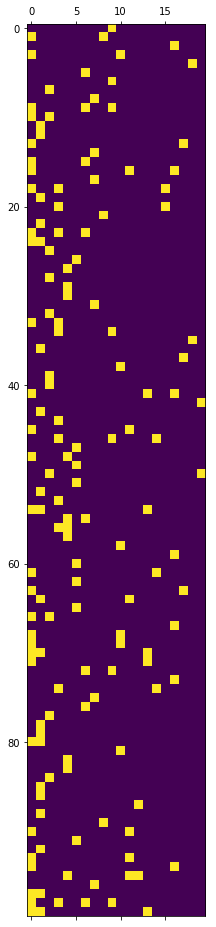

In [15]:
plt.matshow(reorder_data_labels[0:100])

In [16]:
sum(reorder_data_labels[:,0])

8102.0

In [17]:
reorder_data_labels.shape

(21503, 20)

In [18]:
weighted_reorder_data_labels = np.empty_like(reorder_data_labels)
for cls_idx in range(20):
    weighted_reorder_data_labels[:, cls_idx:cls_idx+1] = reorder_data_labels[:, cls_idx:cls_idx+1] * 2**cls_idx

In [19]:
weighted_reorder_data_labels[0:5]

array([[     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    512.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.],
       [     1.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,    256.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  65536.,      0.,      0.,      0.],
       [     1.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,   1024.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,    

In [20]:
sort_idx= np.argsort(weighted_reorder_data_labels.sum(axis=1)) # from small to large
sort_idx[0:10]

array([16572, 18005, 17995, 17994, 17990, 17987, 17985, 17984, 17982,
       17981], dtype=int64)

In [21]:
reorder_data_labels[10425]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [22]:
sort_reorder_data_labels = reorder_data_labels[sort_idx,:]

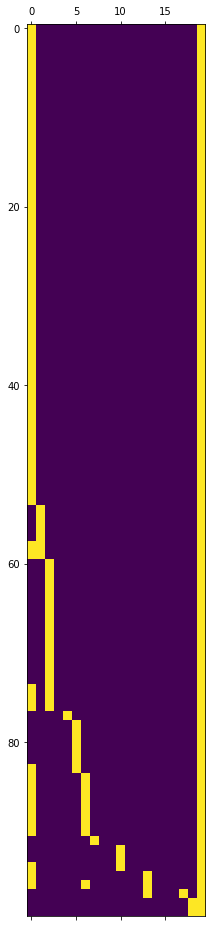

In [23]:
plt.matshow(sort_reorder_data_labels[-100:])

In [24]:
cv2.imwrite('sort_reorder_data_labels.png', sort_reorder_data_labels)

True

In [25]:
# count the number of images
num_img_i = np.array([])
for i in range(21):
    num_img_ii = np.array([np.argwhere(weighted_reorder_data_labels.sum(axis=1)<2**i).shape[0]])
    num_img_i = np.concatenate((num_img_i,num_img_ii))
num_img_dict = dict(zip(range(21),num_img_i))
num_img_dict

{0: 0.0,
 1: 2311.0,
 2: 4137.0,
 3: 5912.0,
 4: 6658.0,
 5: 8226.0,
 6: 9559.0,
 7: 10297.0,
 8: 11396.0,
 9: 12442.0,
 10: 13285.0,
 11: 14308.0,
 12: 15262.0,
 13: 15998.0,
 14: 16963.0,
 15: 17860.0,
 16: 18784.0,
 17: 19636.0,
 18: 20416.0,
 19: 20985.0,
 20: 21503.0}

The first 1189 images only contain 'person' (the first class), the first 2237 images only contain 'person' and 'dog' (the first 2 class), and so on. Iamges 11237-11540 must contain 'cow' (the last class) and may contain all other classes.

In [27]:
sort_reorder_data_labels[2310,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [28]:
sort_reorder_data_labels[2311,:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [29]:
# segment the dataset into 3 subsets
seg = np.array([0,5,12,20])
num_seg = 3
for i in range(1,num_seg+1):
    datalabeli = sort_reorder_data_labels[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]]),:]
    np.savetxt('datalabel'+str(i)+'.txt', datalabeli, fmt='%d')

In [30]:
def dname(dictx,idx):
    listx = []
    for item in idx:
        listx.append(dictx[item])
    return listx

In [31]:
for i in range(1,num_seg+1):
    with open('dataname'+str(i)+'.txt','w') as file:
        dataidxi = sort_idx[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]])]
        datanamei = dname(datadict,dataidxi) # datadict: the diction of integer index and the real name
#         file.write(str(datanamei))
        for line in datanamei:
            file.write(line+'\n')

output files:  
  datanamei: the real names of the ith part images  
  datalabeli: the corresponding labels of the ith part images

In [32]:
# compute the number of labels for each image
nlabels = np.sum(data[:,1:],axis=1)
np.savetxt('nlabels.txt', nlabels, fmt='%d')
nlabels.shape

(21503,)

In [33]:
nlabels[0:50]

array([1., 2., 1., 2., 1., 1., 1., 1., 1., 3., 2., 1., 1., 2., 1., 2., 3.,
       1., 3., 1., 2., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 3., 1., 2., 1.])

In [34]:
# sort_idx[int(num_img_dict[seg[0]]):int(num_img_dict[seg[1]])]
nlabels1 = nlabels[sort_idx[int(num_img_dict[seg[0]]):int(num_img_dict[seg[1]])]]
nlabels2 = nlabels[sort_idx[int(num_img_dict[seg[1]]):int(num_img_dict[seg[2]])]]
nlabels3 = nlabels[sort_idx[int(num_img_dict[seg[2]]):int(num_img_dict[seg[3]])]]
nlabels1.shape

(8226,)

In [36]:
nlabels1[4000:4200]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
for i in range(1,num_seg+1):
    nlabelsi = nlabels[sort_idx[int(num_img_dict[seg[i]]):int(num_img_dict[seg[i-1]])]]
    np.savetxt('nlabels'+str(i)+'.txt', datalabeli, fmt='%d')

In [40]:
for i in range(1,num_seg+1):
    with open('datanamelabel'+str(i)+'.txt','w') as file:
        datalabeli = sort_reorder_data_labels[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]]),:]
#         datalabeli = datalabeli
        dataidxi = sort_idx[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]])]
        datanamei = dname(datadict,dataidxi) # datadict: the diction of integer index and the real name 
        datanamelabeli = list(range(datalabeli.shape[0]))
        for j in range(datalabeli.shape[0]):
            datanamelabeli[j] = datanamei[j] + str(datalabeli[j])
            file.write(datanamelabeli[j]+'\n')
#         for j in range(datalabeli.shape[0]):
#             file.write(datanamei[j]+' ')
#             file.write(str(datalabeli[j])+'\n')       

In [43]:
with open('dataname1.txt','r') as file:
    lines = file.readlines()
lines[0]

'2011_000725\n'

In [44]:
type(lines[0])

str

the data type of eachline in 'datanamelabeli.txt' is str. Suggest to use 'datanamei.txt' + 'datalabel.txt'